In [1]:
#%matplotlib inline

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import wordpunct_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import _check_stop_list
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics.pairwise import cosine_similarity
def new_euclidean_distances(X, Y=None, Y_norm_squared=None, squared=False):
    return cosine_similarity(X,Y)

from sklearn.cluster import k_means_
k_means_.euclidean_distances = new_euclidean_distances

from sklearn import cluster

from sklearn.metrics import confusion_matrix, accuracy_score

def eval_accuracy(y_test, y_pred):
    figsize(7,7)
    print "\nPercent correct = %0.2f%%\n" % (accuracy_score(y_test, y_pred)*100)
    cm = confusion_matrix(y_test, y_pred)
    matshow(cm)
    set_cmap('Blues')
    text(4.5, -1.5, "Confusion matrix",
             horizontalalignment="center",
             fontsize=23)
    colorbar()
    ylabel('True label', fontsize=15)
    xlabel('Predicted label', fontsize=15)
    #tight_layout()
    show()
    print cm

# Discovering Claims Categories

* 
* Robert Coop
* Jeff Myers
* 
* Jason Sanchez
* AJ Rader
* Justin Tirone

## Read in and parse the data

In [3]:
# to parse the data
try:
    from xml.etree.cElementTree import XML
except ImportError:
    from xml.etree.ElementTree import XML
import zipfile


"""
Module that extract text from MS XML Word document (.docx).
(Inspired by python-docx <https://github.com/mikemaccana/python-docx>)
"""

WORD_NAMESPACE = '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}'
PARA = WORD_NAMESPACE + 'p'
TEXT = WORD_NAMESPACE + 't'


def get_docx_text(path):
    """
    Take the path of a docx file as argument, return the text in unicode.
    """
    document = zipfile.ZipFile(path)
    xml_content = document.read('word/document.xml')
    document.close()
    tree = XML(xml_content)

    paragraphs = []
    for paragraph in tree.getiterator(PARA):
        #texts = [node.text
        texts = [node.text.encode('ascii','ignore')
                 for node in paragraph.getiterator(TEXT)
                 if node.text]
        if texts:
            paragraphs.append(''.join(texts))

    return '\n\n'.join(paragraphs)


In [4]:
#
#
#WORD_NAMESPACE = '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}'
#PARA = WORD_NAMESPACE + 'p'
#TEXT = WORD_NAMESPACE + 't'


def get_docx_text2(path,mode='ascii'):
    """
    Take the path of a docx file as argument, return the text in unicode.
    """
    document = zipfile.ZipFile(path)
    xml_content = document.read('word/document.xml')
    document.close()
    tree = XML(xml_content)

    paragraphs = []
    for paragraph in tree.getiterator(PARA):
        #texts = [node.text
        texts = [node.text.encode(mode,'ignore')
                 for node in paragraph.getiterator(TEXT)
                 if node.text]
        if texts:
            paragraphs.append(''.join(texts))

    return '\n'.join(paragraphs)


In [5]:
cd "/home/kesj/work/nov2014hackday/data"

/home/kesj/work/nov2014hackday/data


In [31]:
import glob
all_lines = []

fnames = glob.glob('*.docx')
for f in fnames:
    txt = get_docx_text(f)
    lines = [l for l in txt.splitlines() if len(l)>0]
    all_lines.extend(lines)

len(all_lines)


428

In [7]:
# get 1st word for each line:
from collections import defaultdict
lineWordCount = defaultdict(int)
for l in all_lines:
    wordKey = l.split(' ')[0]
    lineWordCount[wordKey]+=1
    

In [47]:
len(all_lines)

428

In [ ]:
[ len(a) for a in all_lines]

In [33]:
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.feature_extraction.text import _check_stop_list
stoplist = set(_check_stop_list('english'))
#print len(stoplist)

In [34]:
#from nltk.stem import SnowballStemmer
#from nltk.tokenize.punkt import PunktWordTokenizer

stemmer = SnowballStemmer('english')
punkt_tokenizer = PunktWordTokenizer()

def tokenize(x):
    return [stemmer.stem(s) for s in punkt_tokenizer.tokenize(x)]

#bow_matrix = CountVectorizer(tokenizer=tokenize).fit_transform(texts)
#normalized = TfidfTransformer().fit_transform(bow_matrix)

tokenizer=tokenize

In [35]:
documents=all_lines
texts = [[stemmer.stem(word) for word in (''.join(x for x in document.lower() if x in set('qwertyuiopasdfghjklz xcvbnm-'))).split() 
          if word not in stoplist] for document in documents]

print shape(texts)

(428,)


In [36]:
#stoplist = set(._check_stop_list('english'))
documents=all_lines
texts = [[stemmer.stem(word) for word in (''.join(x for x in document.lower() if x in set('qwertyuiopasdfghjklz xcvbnm|'))).split() if word not in stoplist] for document in documents]
# remove words that appear only once
all_tokens = sum(texts)#, [])
#from itertools import chain
#all_tokens = list(chain.from_iterable(texts))
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word)< (0.01 * len(texts)))
my_text = [[word for word in text if word not in tokens_once] for text in texts if len(text)>5]


In [37]:
shape(my_text)

(359,)

In [46]:
my_text

[[u'john',
  u'present',
  u'retent',
  u'analysi',
  u'underwrit',
  u'oper',
  u'manag',
  u'jon'],
 [u'ron',
  u'present',
  'cr',
  u'quot',
  u'qlikview',
  u'dashboard',
  u'market',
  u'insight',
  u'feedback',
  u'posit'],
 [u'ron',
  u'continu',
  u'finish',
  u'touch',
  u'dashboard',
  u'data',
  'cr',
  u'cube'],
 [u'david',
  u'exhibit',
  u'show',
  u'competit',
  u'posit',
  u'market',
  u'demograph',
  u'creat',
  u'continu',
  u'work'],
 [u'david',
  u'current',
  u'look',
  u'geico',
  u'rate',
  u'illinoi',
  u'geico',
  u'competit',
  u'state',
  u'farm',
  u'pif',
  u'state',
  u'farm',
  u'quot',
  u'book',
  u'busi'],
 [u'greg',
  u'help',
  u'valid',
  u'data',
  u'produc',
  u'project',
  u'design',
  u'relationship',
  u'competit',
  u'defect'],
 [u'greg', u'continu', u'train', u'ben', u'rate', u'valid', u'process'],
 [u'rodney',
  u'began',
  u'research',
  'ho',
  u'convers',
  u'rate',
  'ho',
  u'pif',
  u'data',
  u'upcom',
  u'qcu'],
 [u'rodney', u'prepa

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV_vectorizer = CountVectorizer()

In [39]:
vectorizer = TfidfVectorizer(tokenizer = tokenizer,max_df=.9, min_df=0.01, stop_words=stoplist,
                             strip_accents="ascii", ngram_range=(0,5))

In [17]:
#X_trans=CV_vectorizer.fit_transform(my_text)

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
texts = [[word for word in (''.join(x for x in document.lower() if x in set('qwertyuiopasdfghjklz xcvbnm-|'))).split() if word not in stoplist] for document in all_lines]


In [ ]:
texts = [[word for word in (''.join(x for x in document.lower() if x in set('qwertyuiopasdfghjklz xcvbnm-|'))).split() if word not in stoplist] for document in all_lines]
# remove words that appear only once
all_tokens = sum(texts)
#tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word)< (0.01 * len(texts)))

texts = [[word for word in text if word not in tokens_once] for text in texts]

#tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
#

In [ ]:
lineWordCount.keys()

In [20]:
vectorizer = TfidfVectorizer(tokenizer = tokenizer,max_df=.9, min_df=.01, stop_words=stoplist,
                             strip_accents="ascii", ngram_range=(1,4))

In [40]:
X_trans = vectorizer.fit_transform(all_lines)
X_trans.shape

(428, 349)

In [22]:
vectorizer.get_feature_names()

[u'&',
 u'(',
 u')',
 u') .',
 u',',
 u', 2014',
 u'.',
 u'2014',
 u'2014.07',
 u'2014.10',
 u':',
 u'abamont',
 u'access',
 u'ad',
 u'ad hoc',
 u'addit',
 u'adob',
 u'agent',
 u'aj',
 u'aj rader',
 u'analysi',
 u'analyst',
 u'analyt',
 u'ani',
 u'append',
 u'append.',
 u'appli',
 u'area',
 u'assist',
 u'attend',
 u'auto',
 u'auto pif',
 u'auto polici',
 u'auto quot',
 u'avail',
 u'bank',
 u'bank stress',
 u'bank stress test',
 u'base',
 u'began',
 u'ben',
 u'ben team',
 u'ben team :',
 u'best',
 u'bi',
 u'bi data',
 u'bi data govern',
 u'big',
 u'big data',
 u'build',
 u'busi',
 u'busi research',
 u'carrier',
 u'cei',
 u'central',
 u'chang',
 u'channel',
 u'check',
 u'chestang',
 u'chestang complet',
 u'chris',
 u'chris defield',
 u'chris hunt',
 u'christi',
 u'cindi',
 u'cindi rippel',
 u'claim',
 u'code',
 u'compani',
 u'compar',
 u'compar rate',
 u'competit',
 u'competit posit',
 u'complet',
 u'consult',
 u'continu',
 u'continu analysi',
 u'continu work',
 u'convers',
 u'convers ra

# group the bullets

In [41]:
from sklearn import cluster
import pandas as pd
def clusterBullets(X,nclusters=14,random_state=44,show_plot=True):
    clstr = cluster.KMeans(random_state=random_state, n_clusters=nclusters)
    clstr.fit(X_trans)
    if show_plot:
        obs_per_cluster = pd.Series(clstr.labels_).value_counts()
        obs_per_cluster.plot(kind="bar",color='cadetblue')
        ylabel('Number of Observations')
        xlabel('Cluster ID')
        show()
    return clstr

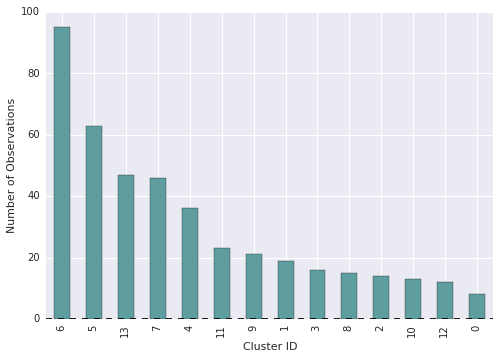

In [42]:
cc = clusterBullets(X_trans,14)

## Determine what each group represents

In [43]:
terms = vectorizer.get_feature_names() 
from sklearn.ensemble import RandomForestClassifier
def plotGroupDetails(X,cluster,terms,nestimators=100):
    nclusters = cluster.n_clusters
    X_dense = X.toarray()
    y = cluster.labels_
    obs_per_cluster = pd.Series(cluster.labels_).value_counts()
    for k in range(nclusters):
        y_binary = pd.Series(y).replace(k, nestimators)
        y_binary = y_binary.replace([e for e in range(nclusters) if e != k], 0)
        Forest = RandomForestClassifier(n_estimators=nestimators)
        Forest.fit(X_dense, y_binary)
        temp = pd.Series(Forest.feature_importances_, index=terms)
        temp.sort(ascending=False)
        temp[:7].plot(kind="bar", figsize=(8,3), fontsize=14, grid=False, alpha=0.7, linewidth=0.0)
        xticks(rotation=50, ha="right")
        title("Group %d  (n = %d)" % (k, obs_per_cluster[k]), fontsize=20)
        show()

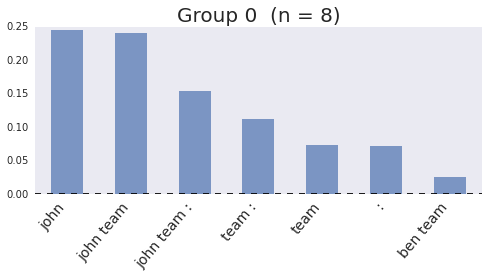

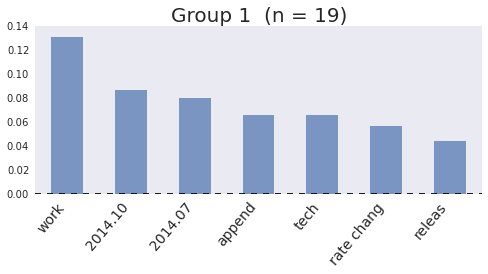

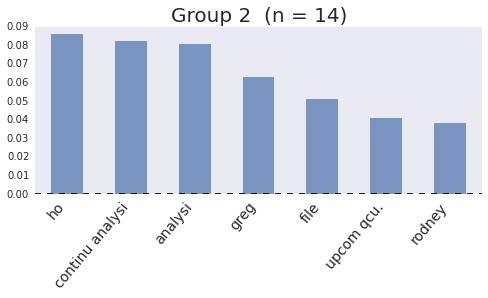

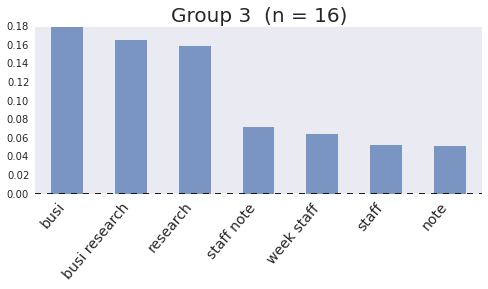

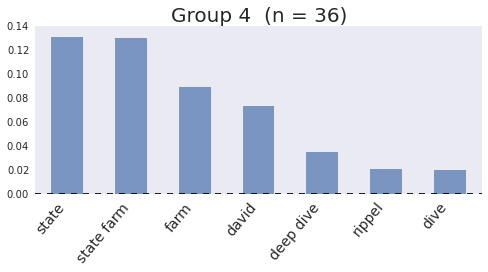

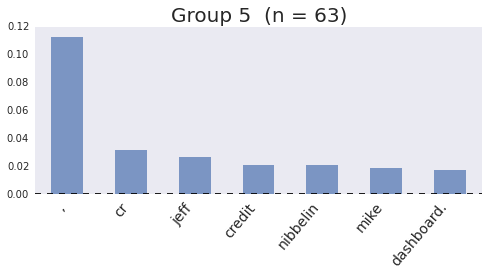

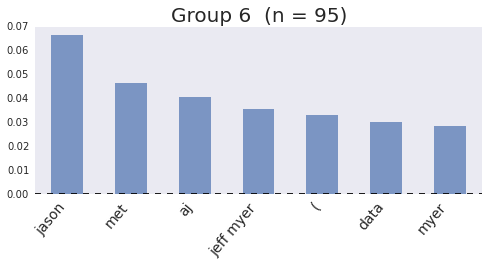

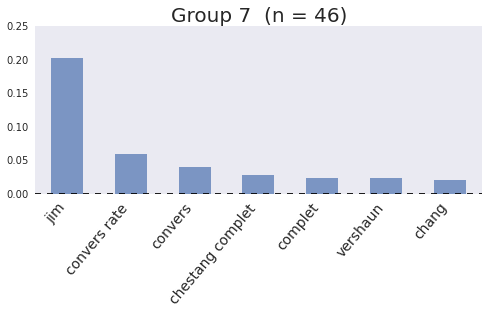

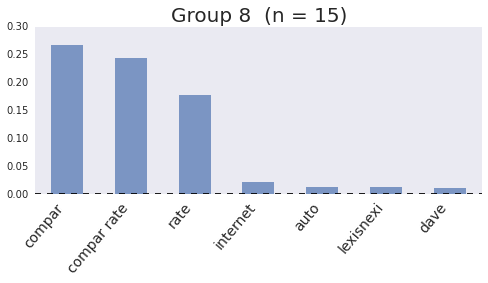

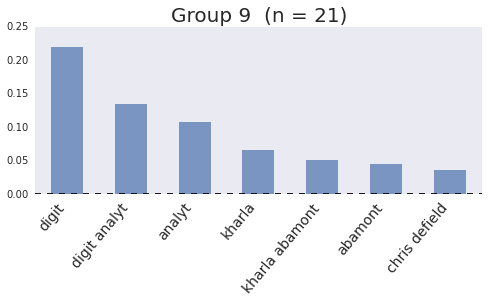

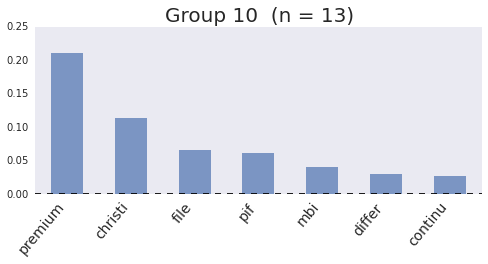

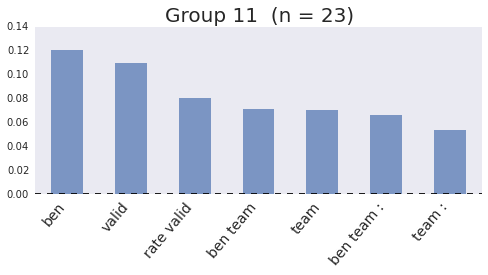

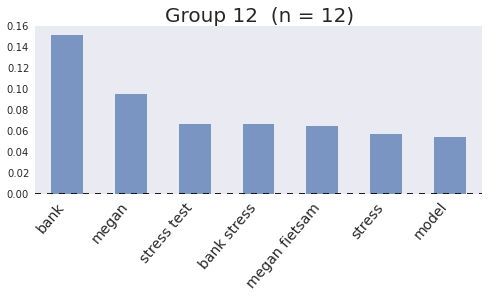

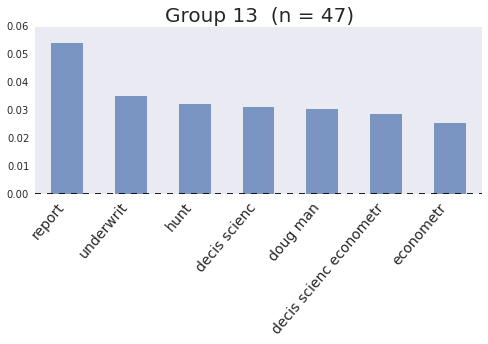

In [44]:
plotGroupDetails(X_trans,cc,terms)


## look at cosine similarity between bullet points?

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
np.shape(X_trans)

(428, 349)

In [45]:
cosSIM_bullets = cosine_similarity(X_trans,X_trans)
np.shape(cosSIM_bullets)

(428, 428)

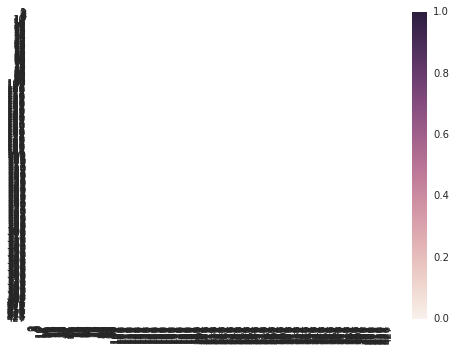

In [30]:
import seaborn as sns
sns.set()
sns.__version__
sns.heatmap(cosSIM_bullets)

In [ ]:
# try pca on the vectorized dataset


In [ ]:
X = df = pd.read_csv('HACK_DAY_DATA.csv', infer_datetime_format=True, 
                     dtype={'RSRV_COL_CD': str, 'CLM_ID': str, 'LOS_DESC_TXT':str}) 
X_raw = X.copy()
X = X.LOS_DESC_TXT.apply(str)
X[X.isnull() == True] = "Missing"
X = X.apply(lambda s: ''.join(x for x in s.lower() if x in set('qwertyuiopasdfghjklz xcvbnm|')))

def replace_words(s):
    new_text = []
    for e in s.split():
        if e.lower() == "home":
            new_text.append("house")
        else:
            new_text.append(e)
    return " ".join(new_text)
X = X.apply(replace_words)

In [ ]:
# use PUNKT tokenizer
from nltk.tokenize.punkt import PunktWordTokenizer
#s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
txt0b = PunktWordTokenizer().tokenize(notes2[0])
txt0b

## Example claims

In [ ]:
example_claim_1 = X_raw["LOS_DESC_TXT"][1]
example_claim_2 = X_raw["LOS_DESC_TXT"][5]

print example_claim_1 + "\n"
print example_claim_2

## Vectorize the words

In [ ]:
# Add stop words
more_stop_words = """agent dimont fatalities insured s ph phs rd started claim noticed 
                     n e w south north west east insd insureds went got stated said know 
                     t policy nan ni took policyholder unsure states like""".split()
stop_words = _check_stop_list('english') | set(more_stop_words)
stop_words = set(stop_words)
stop_words.remove("fire")
vectorizer = TfidfVectorizer(max_df=.9, min_df=50, stop_words=stop_words,
                             strip_accents="ascii", ngram_range=(0,2))
X_trans = vectorizer.fit_transform(X)
X_trans.shape

In [ ]:
vectorizer.get_feature_names()

## Automatically group claims

In [ ]:
clstr = cluster.KMeans(random_state=42, n_clusters=14)
clstr.fit(X_trans)
obs_per_cluster = pd.Series(clstr.labels_).value_counts()
obs_per_cluster.plot(kind="bar")
show()

In [ ]:
texts2 = [''.join(x for x in document.lower() if x in set('qwertyuiopasdfghjklz xcvbnm-')) for document in all_lines]
#shape(texts2), shape(all_lines)

In [ ]:
#def myVectorizor()
vectorizer2 = TfidfVectorizer(max_df=.9, min_df=.01, stop_words=stoplist,
                             strip_accents="ascii", ngram_range=(0,5))



In [ ]:
texts2[0]

In [ ]:
for a in texts2:
    print a,len(a.split(''))

In [ ]:
X_trans = vectorizer2.fit_transform(texts2)
X_trans.shape

In [ ]:
X_trans[:3]

In [ ]:
# cluster the bullets
clstr = cluster.KMeans(random_state=42, n_clusters=14)
clstr.fit(X_trans)
obs_per_cluster = pd.Series(clstr.labels_).value_counts()
obs_per_cluster.plot(kind="bar")
show()

In [ ]:
lineWordCount.keys()

## Assign meaningful labels to each group

In [ ]:
labels_for_data = {0:"lawn mower",
                   1:"garage fire",
                   2:"various claims",
                   3:"boat",
                   4:"pool",
                   5:"smoke damage",
                   6:"water damage",
                   7:"total loss",
                   8:"personal property",
                   9:"house fire",
                   10:"jewelry",
                   11:"fire",
                   12:"ac unit",
                   13:"burned"}

## Spot unusual trends by tracking groups through time

In [ ]:
time_index = X_raw.LOS_SBMT_TSTMP.apply(lambda x: pd.to_datetime("01/%s/%s" % (x[2:5], x[5:9])))
X_time = pd.DataFrame(clstr.labels_, index=time_index)
X_time.sort_index(inplace=True)
temp = pd.DataFrame(X_time)
grouped = pd.get_dummies(temp[0]).groupby(by=temp.index)
month_count = pd.DataFrame()

for e, frame in grouped:
    month_count[e] = frame.sum()
month_count = month_count.T

for col in month_count.columns:
    month_count[col][8:].plot(figsize=(14,5), c="k", linewidth=3, fontsize=12)
    title(labels_for_data[col], fontsize=14)
    show()

## Quickly detect unexpected claims events

In [ ]:
clf = RandomForestClassifier(100, oob_score=True)
clf.fit(X_dense, y)
clf.oob_decision_function_
y_hat_oob = [[e[0] for e in enumerate(scores) if e[1] == max(scores)][0] for scores in clf.oob_decision_function_]
eval_accuracy(y, y_hat_oob)

### Let's test the model.

In [ ]:
print example_claim_1 + "\n"
print example_claim_2

In [ ]:
def predict_claim_type(claim_description):
    temp = vectorizer.transform(pd.Series(claim_description)).toarray() 
    print "Claim description: %s \n" % claim_description
    print "Predicted group: %s" % labels_for_data[int(clf.predict(temp))]
    pd.Series(clf.predict_proba(temp)[0], labels_for_data.values()).plot(kind="barh", figsize=(10,5))
    show()
    print "\n"
    
predict_claim_type(example_claim_1)
predict_claim_type(example_claim_2)

In [ ]:
predict_claim_type("Lalalallala. What happened! No one has any idea!")

## Example data structure

In [ ]:
week_id = [(1, 2012), (2, 2012), (3, 2012), "..."]

actual_categories = ["FIRE", "ANIMALS", "...", "UNKNOWN"]   # Coop

list_of_categories = [{"claim_type": "Pool", 
                       "claim_key_words": ["pool", "ground", "water"], # Coop
                       "key_word_importance": [100, 90, 80], # Coop
                       "counts_per_week": [43, 54, 12, 12], # Coop
                       "UCL": [47, 57, 14, 10],
                       "LCL": [40, 50, 10, 8],
                       "total_counts": 119, # Coop
                       "example_claims":["pool stuff happened", "The POOL exploded", "..."], # Coop -- max examples
                       "distribution_over_actual_labels":[0, 0, "...", 119]}, # Coop
                       
                       {"claim_type": "Boat",
                        "..."
                        }                      
                      ]
                       
category_importance = ["Pool", "Boat", "Garage Fire", "Lawn Mower", "Smoke Damage", "Jewelry", "..."]

## CI calculations

In [ ]:
sample_data = ['21467', '21256', '20917', '20866', '20934', '21062', '20895', '20813', '20964', '21231', '21183', '21046', '21038', '20982', '20722', '20503', '20286', '20236', '20227', '20396', '20481', '20627', '20758', '20872', '20879', '20917', '20601', '20503', '20435', '20504', '20490', '20607', '20708', '20743', '21018', '21197', '21066', '20827', '20724', '20757', '20851', '20977', '21079', '21229', '21192', '21417', '21338', '21304', '21166', '21118', '21066', '20997', '21140', '21360', '21491', '21477', '21746', '21904', '22005', '22421']

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
y = [int(x) for x in sample_data]

In [ ]:
print y

In [ ]:
def get_predictions(y):
    """y: list like object"""
    base_x = np.arange(0, len(y))
    X = pd.DataFrame(base_x, columns=["x"])
    X["x^2"] = base_x**2
    X["x^3"] = base_x**3

    base_month = base_x % 12
    for element in range(12):
        X["d" + str(element)] = (base_month == element)*1

    lr = LinearRegression()
    lr.fit(X, y)
    X_p = lr.predict(X)
    return X_p

def get_CIs(y):
    """returns UCL and LCL"""
    X_p = get_predictions(y)
    n_standard_deviations = 1.96
    standard_deviation = (((y - X_p)**2).sum()/(len(y)-1))**(.5)
    UCL = X_p + standard_deviation * n_standard_deviations
    LCL = X_p - standard_deviation * n_standard_deviations
    return UCL, LCL

In [ ]:
def get_predictions_weekly(y):
    """y: list like object"""
    base_x = np.arange(0, len(y))
    X = pd.DataFrame(base_x, columns=["x"])
    X["x^2"] = base_x**2
    X["x^3"] = base_x**3
    base_month = base_x % 12
    base = (base_x / 4 ) % 13
    
    for element in range(12):
        X["d" + str(element)] = (base == element)*1
        
    lr = LinearRegression()
    lr.fit(X, y)
    X_p = lr.predict(X)
    return X_p

def get_CIs_weekly(y):
    """
    y is a list like object. (Counts through time)
    returns UCL, LCL, and importance of last point
    """
    X_p = get_predictions_weekly(y)
    n_standard_deviations = 1.96
    standard_deviation = (((y - X_p)**2).sum()/(len(y)-1))**(.5)
    error_of_last_point = np.abs(y[-1:] - X_p[-1:])
    standardized_error_of_last_point = error_of_last_point/standard_deviation
    UCL = X_p + standard_deviation * n_standard_deviations
    LCL = X_p - standard_deviation * n_standard_deviations
    return UCL, LCL, standardized_error_of_last_point

In [ ]:
UCL, LCL, importance_of_last_point = get_CIs_weekly(y)

print UCL
print LCL
print importance_of_last_point

plot(UCL)
plot(y)
plot(LCL)
show()

In [ ]:
import json
json_data=open("data.json")
data = json.load(json_data)
json_data.close()

In [ ]:
import numpy as np

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [ ]:
better_dates = [""]+["%s:%s" % (str(date[1]), str(date[0])[2:]) if i%2==0 else "" for i, date in enumerate(data["week_id"])]
print better_dates

In [ ]:
terms = [u'hail damage', u'hail damage roof', u'damage roof', u'wind hail damage', u'wind hail', u'wind hail damage roof', u'possible hail damage', u'possible hail', u'possible', u'possible hail damage roof']
importances = [8.223633045300254, 6.632623373024898, 5.96108359745089, 0.5642348824945708, 0.48056411438294433, 0.47280524975865235, 0.3153134637741829, 0.3048362127242999, 0.27528449640413066, 0.2511159452864281]

# Filter out unimportant words
importances = np.array(importances)
importances /= importances.sum()

total = 0
term_count = 0
for e in importances:
    total += e
    term_count += 1
    if total >= .8:
        break
        
terms = terms[:term_count]

terms_to_skip = []

for main_element in terms:
    for second_element in terms:
        if main_element == second_element:
            continue
        if main_element in second_element:
            print main_element, ":", second_element
            terms_to_skip.append(main_element)
            break

terms_to_skip

cat_name = filter(lambda x: x not in terms_to_skip, terms)
cat_name


In [ ]:
temp_category_importance = []

names_of_categories = {
0:'Hail',
1:'Wind',
2:'Internal water',
3:'Tree related',
4:'Shingles',
5:'Fire',
6:'Personal property theft',
7:'Gutters',
8:'Storms',
9:'Basement',
10:"Hail",
11:"Roof",
12:"Siding",
13:"Garage door"
}

for claim_category in data['list_of_categories']:
    c = claim_category['claim_id']
    claim_category["counts_per_week"] = claim_category["counts_per_week"][:-2]
    category_name = names_of_categories[c]
    print category_name
    claim_category['claim_type'] = category_name
    print claim_category["claim_key_words"][:]
    print claim_category['key_word_importance'][:]
    counts = claim_category["counts_per_week"]
    UCL, LCL, importance_of_last_point = get_CIs_weekly(counts)
    figsize(20,5)
    UCL = list(smooth(UCL, window_len=6)[4:])
    LCL = list(smooth(LCL, window_len=6)[4:])
    claim_category["UCL"] = UCL
    claim_category["LCL"] = LCL
    claim_category["category_importance"] = importance_of_last_point[0]
    temp_category_importance.append([category_name, importance_of_last_point[0]])
    plot(counts)
    plot(UCL, "k")
    plot(LCL, "k")
    x = range(len(counts))
    xticks(x, better_dates, rotation=90)
    show()

In [ ]:
temp_category_importance.sort(key=lambda x: x[1], reverse=True)
print temp_category_importance
print [e[0] for e in temp_category_importance]
data['category_importance'] = [e[0] for e in temp_category_importance]

In [ ]:
with open("data2.json", "wb") as json_writer:
    json.dump(data, json_writer)

In [ ]:
!cat data2.json

In [52]:
from nltk.corpus import wordnet as wn 
import nltk as nltk
nltk.data.path.append('/data/san/kes1/public_data/nltk_data')

In [55]:
big1 = wn.synsets('big')[0]
big1

[Synset('large.a.01'),
 Synset('big.s.02'),
 Synset('bad.s.02'),
 Synset('big.s.04'),
 Synset('big.s.05'),
 Synset('big.s.06'),
 Synset('boastful.s.01'),
 Synset('big.s.08'),
 Synset('adult.s.01'),
 Synset('big.s.10'),
 Synset('big.s.11'),
 Synset('big.s.12'),
 Synset('big.s.13'),
 Synset('big.r.01'),
 Synset('boastfully.r.01'),
 Synset('big.r.03'),
 Synset('big.r.04')]

In [75]:
wn.morphy('bad','s')

KeyError: 's'

In [73]:
a = 'large.a.01'#'bat.v.01'
wn.synset(a).hyponyms(), wn.synset(a).hypernyms()

([], [])

In [ ]:
%load_ext soup